In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import env

### Use the cross validation techniques discussed in the lesson to figure out what kind of model works best with the cars dataset used in the lesson.

## Acquire

In [2]:
#acquire mpg data
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

## Prepare

In [6]:
#change trans dataframe to auto and manual
df.trans = np.where(df.trans.str.startswith('auto'), 'auto', 'manual')

In [7]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


## Model

In [8]:
#split into X and y
X = df[['displ', 'year', 'cyl', 'cty', 'hwy']]
X.head()

,displ,year,cyl,cty,hwy
1,1.8,1999,4,18,29
2,1.8,1999,4,21,29
3,2.0,2008,4,20,31
4,2.0,2008,4,21,30
5,2.8,1999,6,16,26


In [9]:
#check y datatype
y = df.trans
y.head()

1      auto
2    manual
3    manual
4      auto
5      auto
Name: trans, dtype: object

In [11]:
#split into trains and tests
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=123)

In [13]:
#check x train shape
X_train.shape

(175, 5)

In [15]:
#check x test shape
X_test.shape

(59, 5)

## Further split by hand

In [16]:
#split data train, validate & test
X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                            y_train, test_size=.30, random_state=123)

In [17]:
#check x train shape
X_train.shape

(122, 5)

In [18]:
#check x validate shape
X_validate.shape

(53, 5)

In [19]:
#check x test shape
X_test.shape

(59, 5)

## use decision tree for predicting target variable

In [20]:
#create tree
tree = DecisionTreeClassifier(max_depth=3)

In [21]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
tree.score(X_train, y_train)

0.6967213114754098

In [23]:
tree.score(X_validate, y_validate)

0.6415094339622641

In [24]:
#create tree
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9836065573770492

In [25]:
tree.score(X_validate, y_validate)

0.6792452830188679

In [27]:
#import
from sklearn.model_selection import cross_val_score


In [28]:
#create tree
tree = DecisionTreeClassifier(max_depth=4, random_state=123)

In [29]:
#cross val score
cross_val_score(tree, X_train, y_train, cv=5)

array([0.56      , 0.56      , 0.58333333, 0.54166667, 0.58333333])

In [30]:
cross_val_score(tree, X_train, y_train, cv=5).mean()

0.5656666666666668

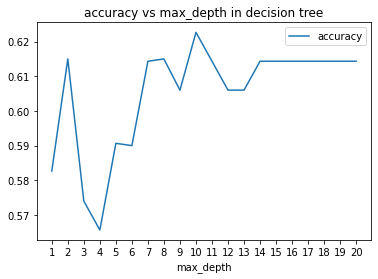

In [31]:
#plot for best max depth
results = []

for x in range(1,21):
    tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    score = cross_val_score(tree, X_train, y_train, cv=5).mean()
    results.append([x, score])
    
pd.DataFrame(results, columns = ['max_depth','accuracy'])\
.set_index('max_depth').plot(xticks=range(1,21))
plt.title('accuracy vs max_depth in decision tree')
plt.show()